# Лабораторная работа №4. 
## Проектирование и применение цифровых КИХ-фильтров
                                                                                                    
Выполнил студент ИВТ-31: Петров Дмитрий

## Основное задание
### 1.Синтез частотно-избирательного КИХ-фильтров оконным методом


C:\Users\Dmitry\AppData\Local\Temp\ipykernel_2672\2433538313.py:52: RuntimeWarning: divide by zero encountered in log10
  plt.plot( ff, 20*np.log10(x) )
c:\Users\Dmitry\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Dmitry\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


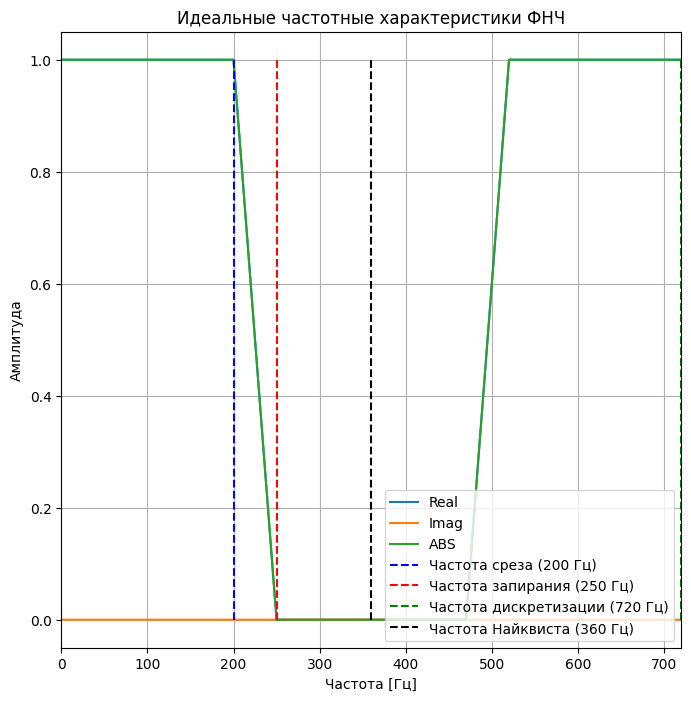

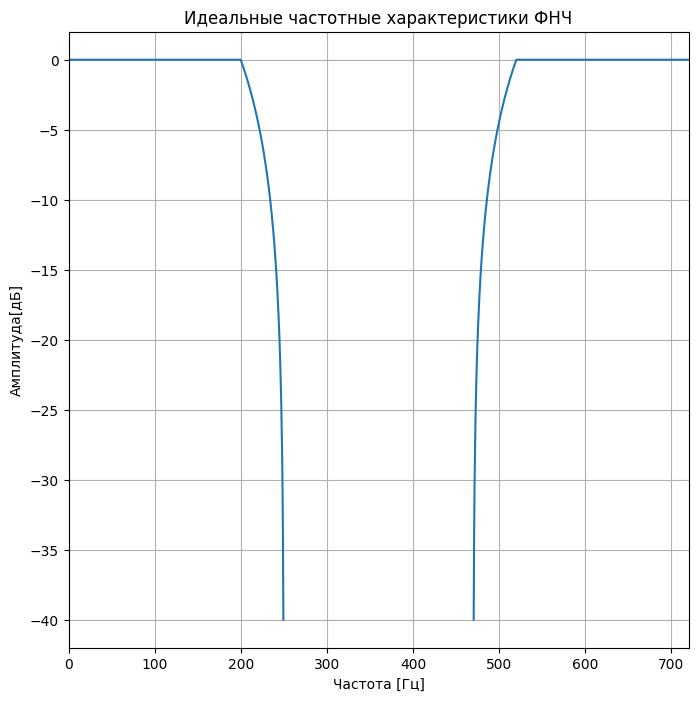

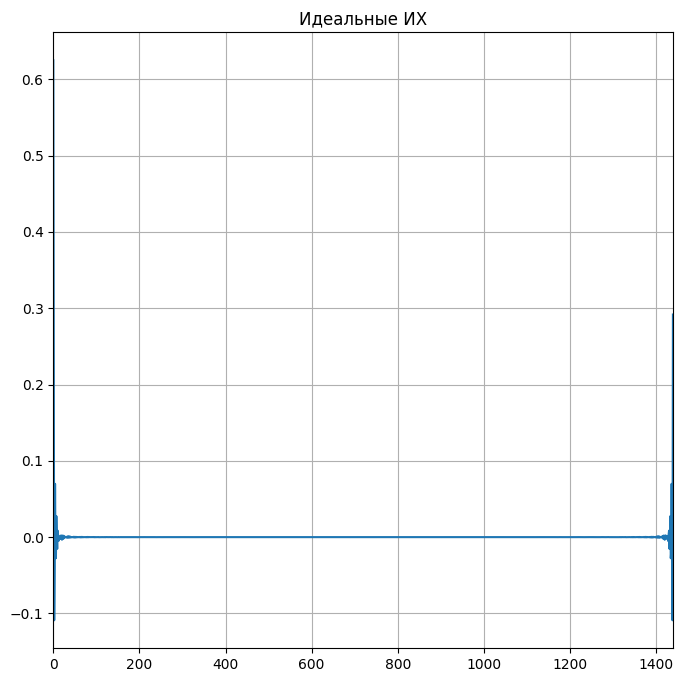

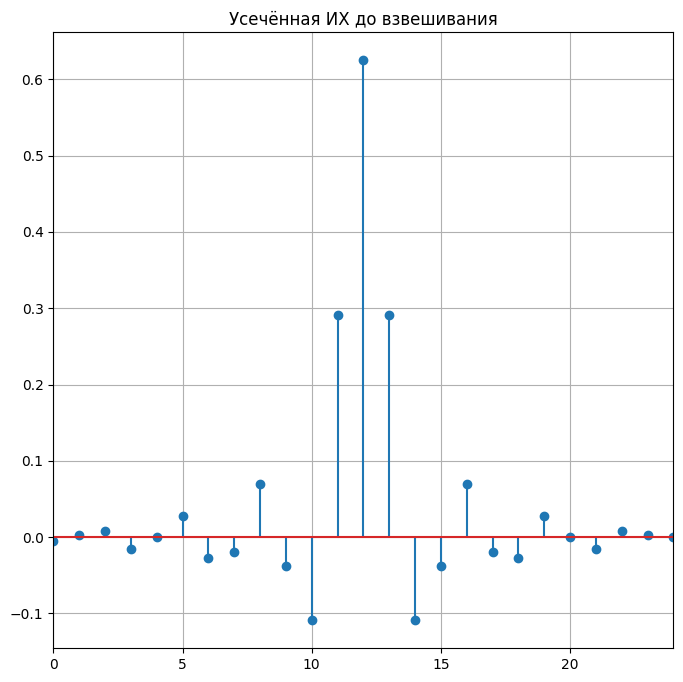

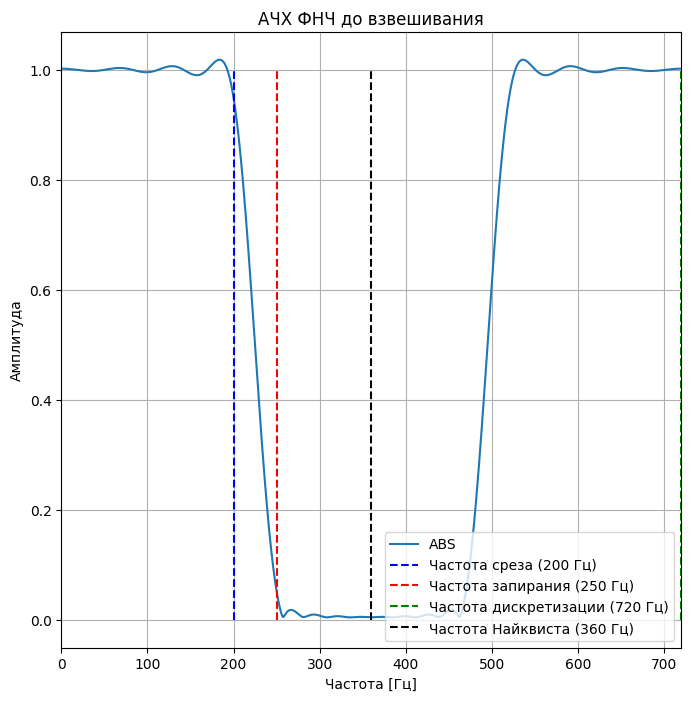

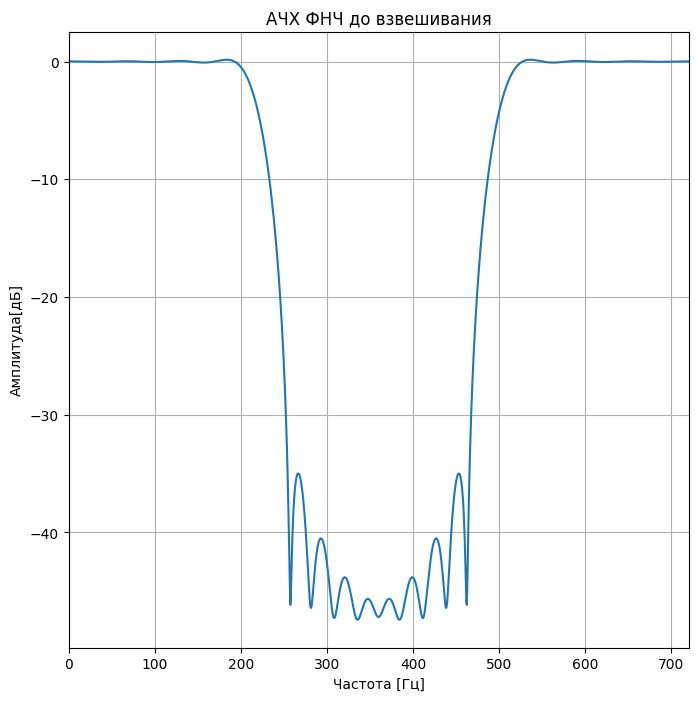

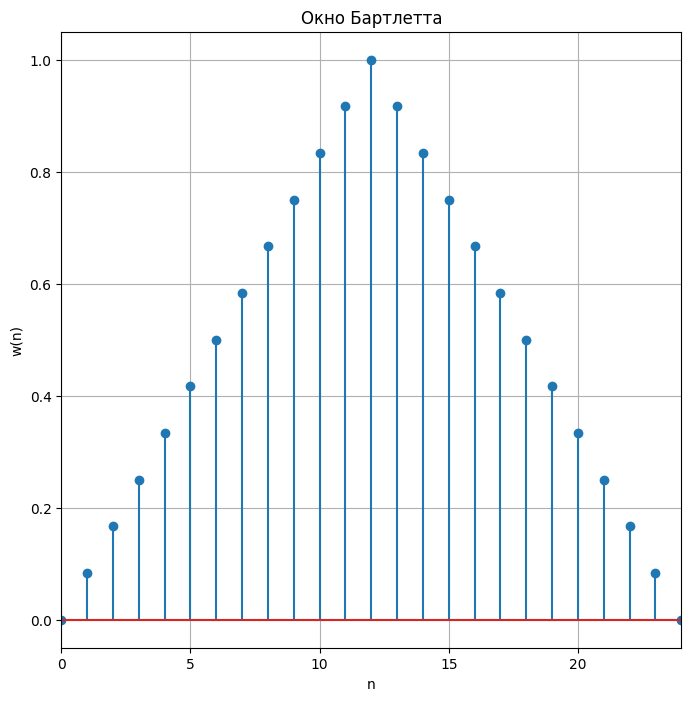

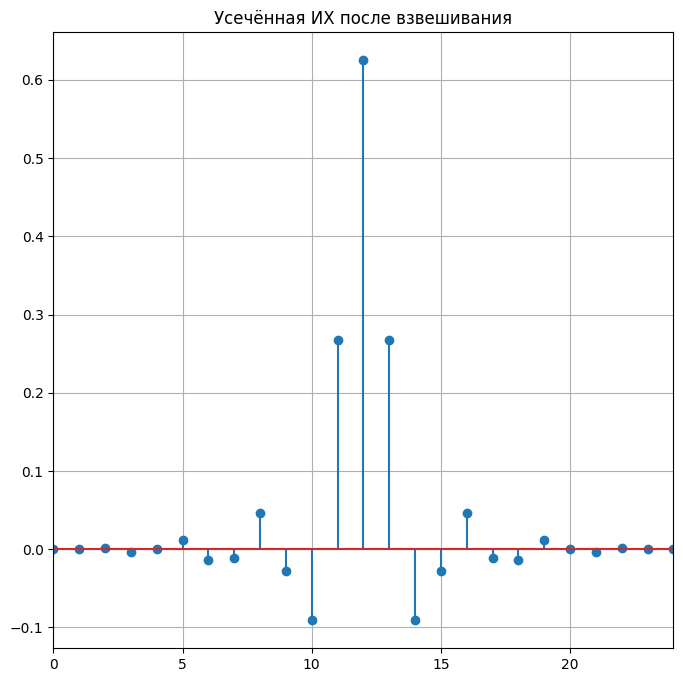

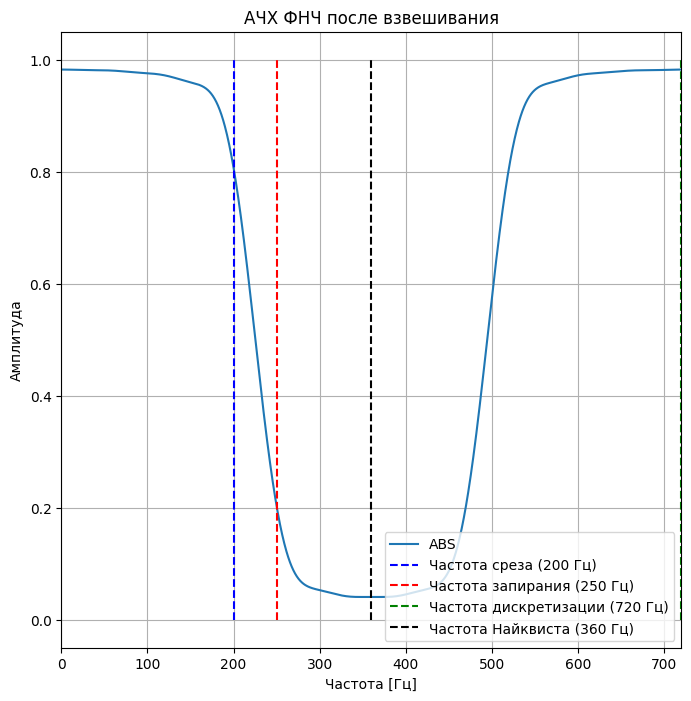

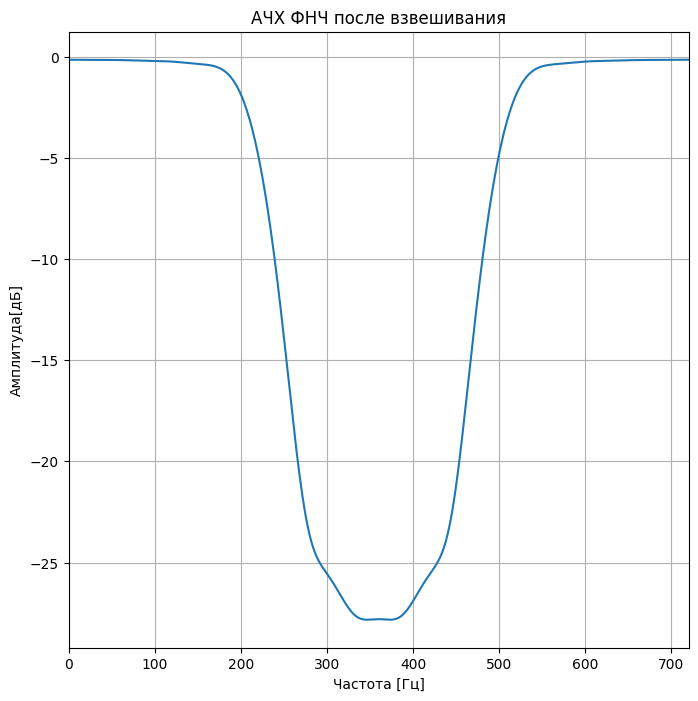

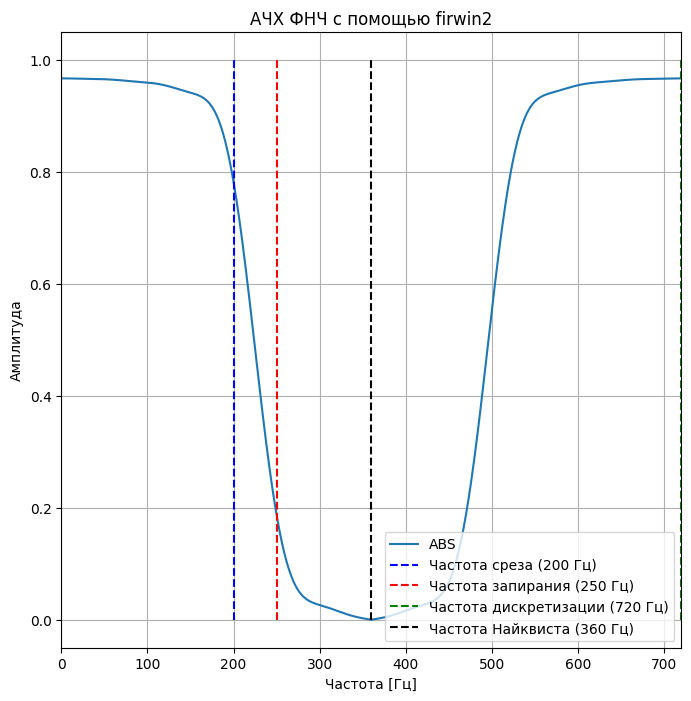

In [186]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.signal import lfilter, firwin2, freqz
from scipy.fftpack import fft, fftfreq, ifft

fs = 720
fn = fs / 2
p  = 24
Nf = p + 1
fpass = 200
fstop = 250
N     = 1440

ff = np.linspace( 0, fs,  N, endpoint=False )
nn = np.linspace( 0, N,  N, endpoint=False )
x = np.ones(N)
Np = int( np.round( fpass * N / fs ) )
Ns = int( np.round( fstop * N / fs ) )

k = np.arctan(1/(Ns-Np))
b = (1 - k *(Np+Ns))/2
for i in range(Np, Ns):
  x[Ns - (i % Np)] = ((k * (i % Np)))

x[Ns:N-Ns] = 0  

for i in range(N - Ns, N - Np):
  x[i] = ((k * (i % (N - Ns))))

y = np.real(ifft(x))

plt.figure(figsize=[8,8])
plt.title( 'Идеальные частотные характеристики ФНЧ' )
plt.plot( ff, np.real(x) )
plt.plot( ff, np.imag(x) )
plt.plot( ff, np.abs(x) )
plt.xlim( [0, fs] ) 
plt.grid( True )
plt.xlabel( 'Частота [Гц]' )
plt.ylabel( 'Амплитуда' )

plt.plot( [fpass, fpass], [0,1], 'b--' )
plt.plot( [fstop, fstop], [0,1], 'r--' )
plt.plot( [fs, fs], [0,1], 'g--' )
plt.plot( [fn, fn], [0,1], 'k--' )
plt.legend(['Real', 'Imag', 'ABS', 'Частота среза (200 Гц)', 'Частота запирания (250 Гц)', 
            'Частота дискретизации (720 Гц)', 'Частота Найквиста (360 Гц)'], loc='lower right')

plt.figure(figsize=[8,8])
plt.title( 'Идеальные частотные характеристики ФНЧ' )
plt.plot( ff, 20*np.log10(x) )
plt.xlim( [0, fs] ) 
plt.grid( True )
plt.xlabel( 'Частота [Гц]' )
plt.ylabel( 'Амплитуда[дБ]' )

y = np.real(ifft(x))

plt.figure(figsize=[8,8])
plt.title( 'Идеальные ИХ' )
plt.plot( nn, y )
plt.xlim( [0, N] ) 
plt.grid( True )

nf = np.linspace( 0, Nf,  Nf, endpoint=False )
y1 = np.zeros(Nf)
y1[0:int(p/2)]     = y[N-int(p/2):N]
y1[int(p/2):p]  = y[0:int(p/2)]

plt.figure(figsize=[8,8])
plt.title( 'Усечённая ИХ до взвешивания' )
plt.stem( nf, y1 )
plt.xlim( [0, Nf-1] ) 
plt.grid( True )


w, h = freqz(y1, worN=N, fs=fs, whole=True)

plt.figure(figsize=[8,8])
plt.title( 'АЧХ ФНЧ до взвешивания' )
plt.plot(w, abs(h))
plt.xlim( [0, fs] ) 
plt.grid( True )
plt.xlabel( 'Частота [Гц]' )
plt.ylabel( 'Амплитуда' )

plt.plot( [fpass, fpass], [0,1], 'b--' )
plt.plot( [fstop, fstop], [0,1], 'r--' )
plt.plot( [fs, fs], [0,1], 'g--' )
plt.plot( [fn, fn], [0,1], 'k--' )
plt.legend(['ABS', 'Частота среза (200 Гц)', 'Частота запирания (250 Гц)', 
            'Частота дискретизации (720 Гц)', 'Частота Найквиста (360 Гц)'], loc='lower right')

plt.figure(figsize=[8,8])
plt.title( 'АЧХ ФНЧ до взвешивания' )
plt.plot( w, 20*np.log10(h) )
plt.xlim( [0, fs] ) 
plt.grid( True )
plt.xlabel( 'Частота [Гц]' )
plt.ylabel( 'Амплитуда[дБ]' )

w_b = ((p) - 2 * np.abs( nf - (p)/2 ))/(p)
plt.figure(figsize=[8,8])
plt.title( 'Окно Бартлетта' )
plt.stem( nf, w_b )
plt.xlim( [0, p] ) 
plt.grid( True )
plt.xlabel( 'n' )
plt.ylabel( 'w(n)' )

y2 = y1 * w_b

plt.figure(figsize=[8,8])
plt.title( 'Усечённая ИХ после взвешивания' )
plt.stem( nf, y2 )
plt.xlim( [0, p] ) 
plt.grid( True )

w1, h1 = freqz(y2, worN=N, fs=fs, whole=True)

plt.figure(figsize=[8,8])
plt.title( 'АЧХ ФНЧ после взвешивания' )
plt.plot(w1, abs(h1))
plt.xlim( [0, fs] ) 
plt.grid( True )
plt.xlabel( 'Частота [Гц]' )
plt.ylabel( 'Амплитуда' )

plt.plot( [fpass, fpass], [0,1], 'b--' )
plt.plot( [fstop, fstop], [0,1], 'r--' )
plt.plot( [fs, fs], [0,1], 'g--' )
plt.plot( [fn, fn], [0,1], 'k--' )
plt.legend(['ABS', 'Частота среза (200 Гц)', 'Частота запирания (250 Гц)', 
            'Частота дискретизации (720 Гц)', 'Частота Найквиста (360 Гц)'], loc='lower right')

plt.figure(figsize=[8,8])
plt.title( 'АЧХ ФНЧ после взвешивания' )
plt.plot( w1, 20*np.log10(h1) )
plt.xlim( [0, fs] ) 
plt.grid( True )
plt.xlabel( 'Частота [Гц]' )
plt.ylabel( 'Амплитуда[дБ]' )


filter_coefs = firwin2(p, [0.0, fpass, fstop, fn], [1.0, 1.0, 0.0, 0.0], fs=fs, window='bartlett')
w3, h3 = freqz(filter_coefs, worN=N, fs=fs, whole=True)
plt.figure(figsize=[8,8])
plt.title( 'АЧХ ФНЧ с помощью firwin2' )
plt.plot(w3, abs(h3))
plt.xlim( [0, fs] ) 
plt.grid( True )
plt.xlabel( 'Частота [Гц]' )
plt.ylabel( 'Амплитуда' )

plt.plot( [fpass, fpass], [0,1], 'b--' )
plt.plot( [fstop, fstop], [0,1], 'r--' )
plt.plot( [fs, fs], [0,1], 'g--' )
plt.plot( [fn, fn], [0,1], 'k--' )
plt.legend(['ABS', 'Частота среза (200 Гц)', 'Частота запирания (250 Гц)', 
            'Частота дискретизации (720 Гц)', 'Частота Найквиста (360 Гц)'], loc='lower right')

plt.show()


### 2. Применение фильтра к сигналу 

1440


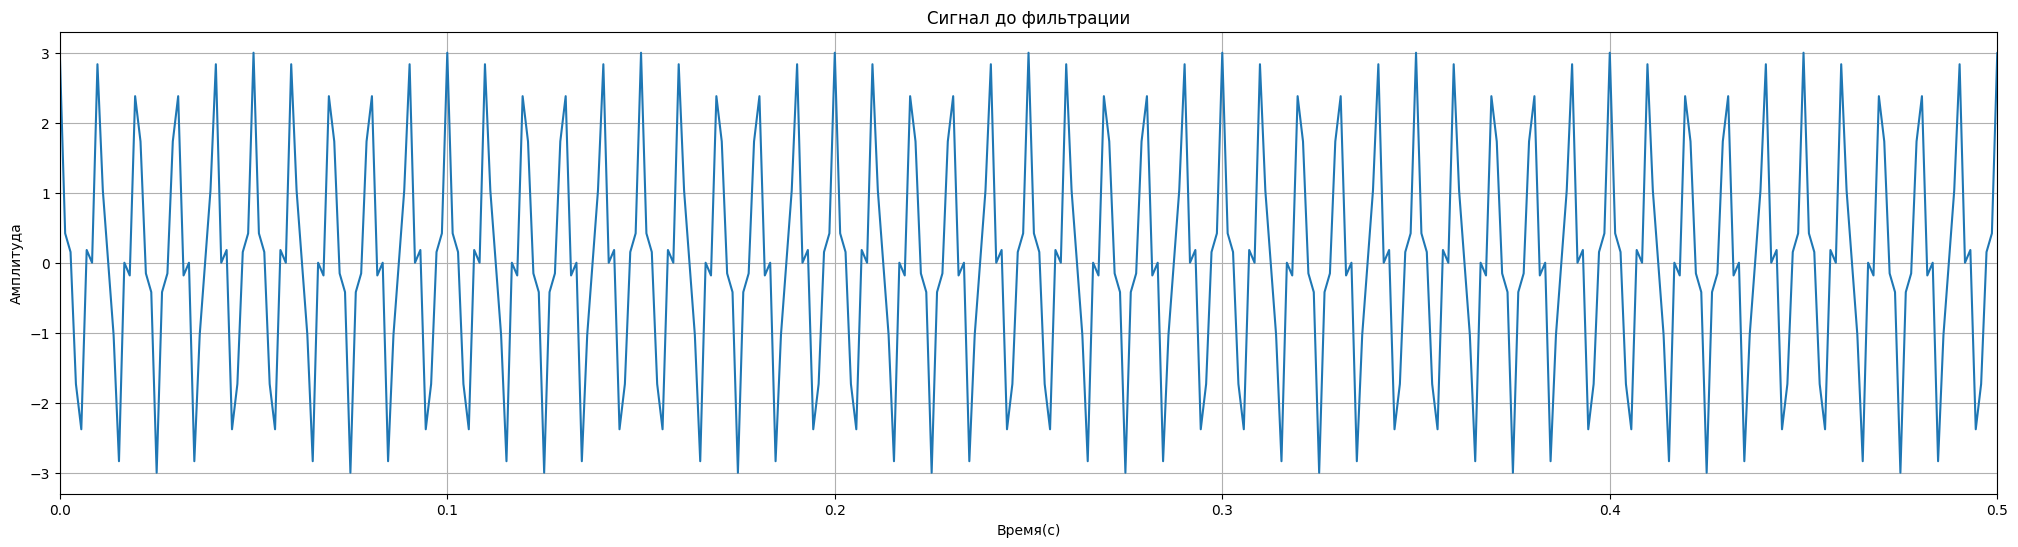

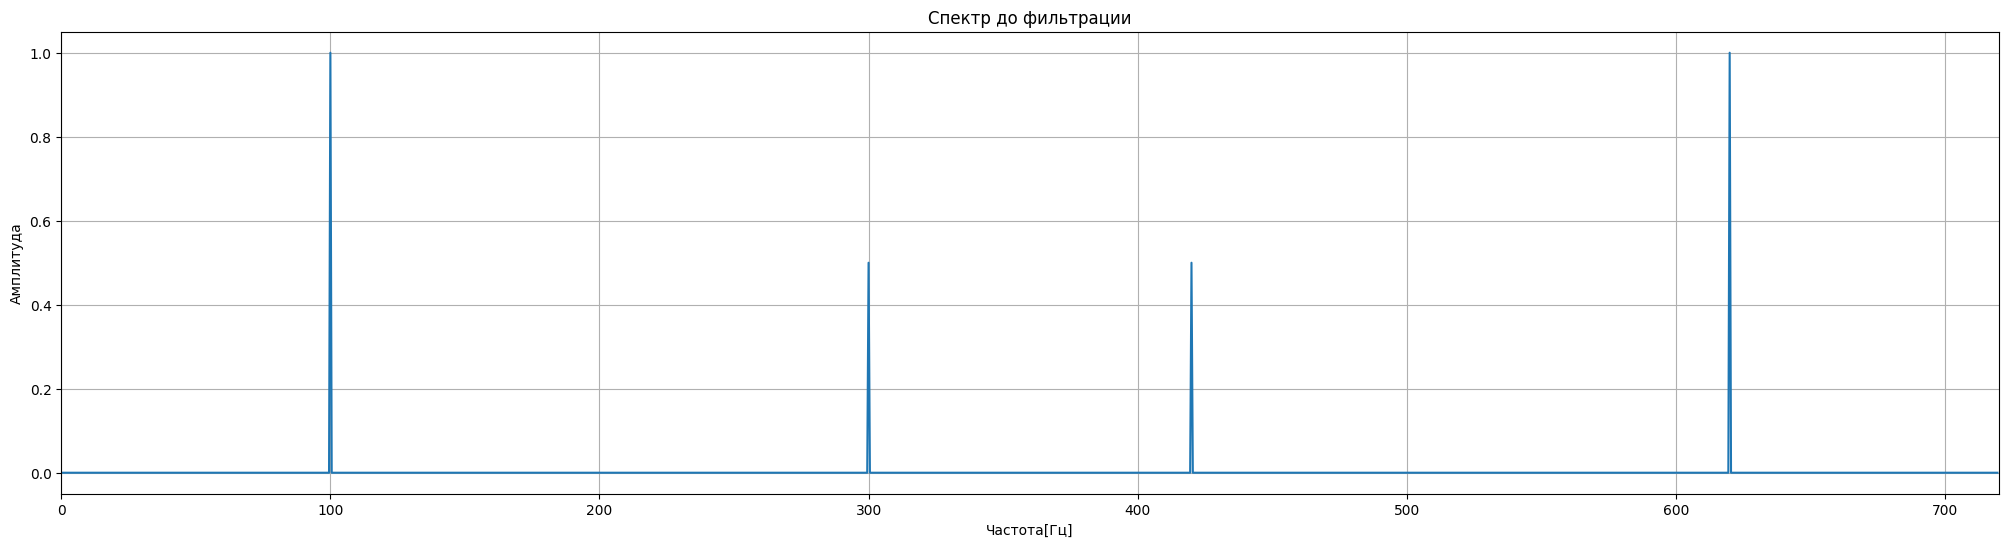

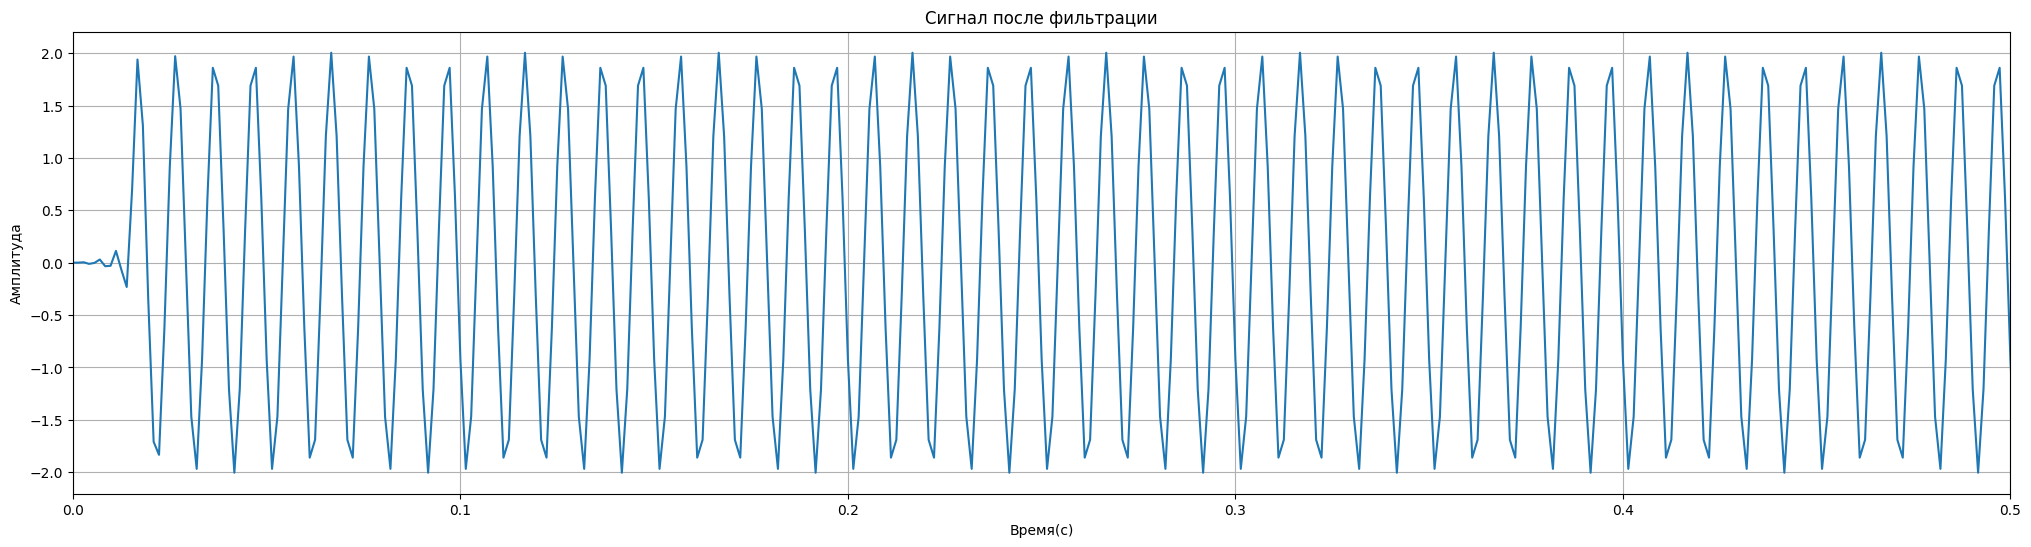

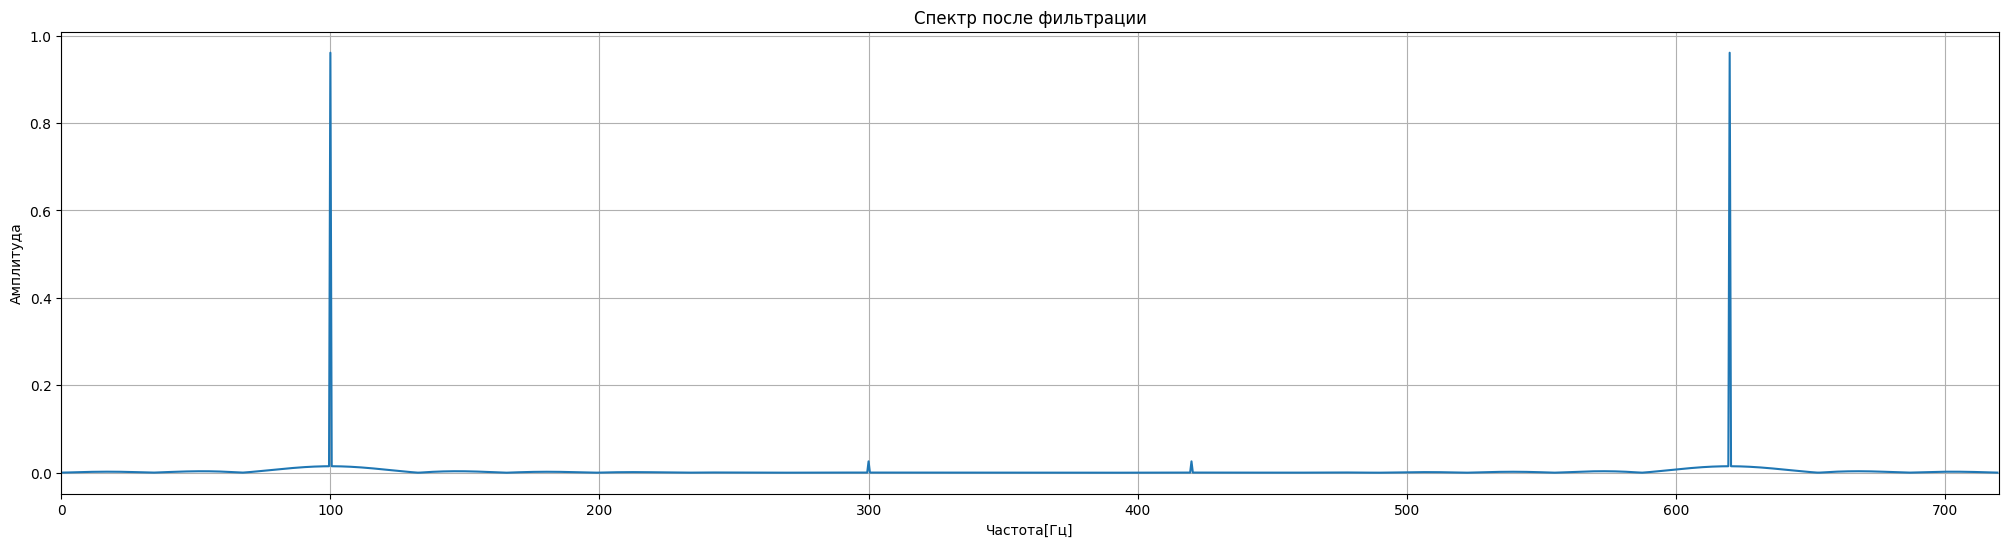

In [187]:
Amp1 = 2
Amp2 = 1

f1 = 100
f2 = 300

T = 1/fs

t = np.linspace(0, N*T, N, endpoint = False)

x1 = Amp1 * np.cos(2 * np.pi * f1 * t )
x2 = Amp2 * np.cos(2 * np.pi * f2 * t )

xsum = x1 + x2
dff = fft(xsum) / N

plt.figure(figsize=[25,6])
plt.title( 'Сигнал до фильтрации' )
plt.plot(t, xsum)
plt.xlim( [0, N*T/4] ) 
plt.grid( True )
plt.xlabel( 'Время(с)' )
plt.ylabel( 'Амплитуда' )

plt.figure(figsize=[25,6])
plt.title( 'Спектр до фильтрации' )
plt.plot(ff, np.abs(dff))
plt.xlim( [0, fs] ) 
plt.grid( True )
plt.xlabel( 'Частота[Гц]' )
plt.ylabel( 'Амплитуда' )

xsum_fil = np.convolve(y2, xsum[0:N - p])

plt.figure(figsize=[25,6])
plt.title( 'Сигнал после фильтрации' )
plt.plot(t, xsum_fil)
plt.xlim( [0, N*T/4] ) 
plt.grid( True )
plt.xlabel( 'Время(с)' )
plt.ylabel( 'Амплитуда' )

dff_fil = fft(xsum_fil) / N

plt.figure(figsize=[25,6])
plt.title( 'Спектр после фильтрации' )
plt.plot(ff, np.abs(dff_fil))
plt.xlim( [0, fs] ) 
plt.grid( True )
plt.xlabel( 'Частота[Гц]' )
plt.ylabel( 'Амплитуда' )

plt.show()